# Stock Market Prediction

In [43]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import random
import pickle

In [20]:
random.seed(42)

In [ ]:
data_dict=[]
for i in range(5):
    with open(f"data_cluster_{i}.pkl", "rb") as file:
        data_dict.append(pickle.load(file))

In [ ]:
# Create sequences with 30 time steps and separate target (Daily_Return is the last column)
time_steps = 20
target_column = 26 # Assuming 'Daily_Return' is the 6th column (index 5)

def create_sequences_with_target(data, time_steps, target_column):
    sequences = []
    targets = []

    max_index = len(data) - time_steps
    for i in range(max_index):
        # Extract a sequence of `time_steps`
        sequence = data[i:i + time_steps]
        sequences.append(sequence)

        # Target is the `Close` (or target_column) for the next day (day 61)
        target = data[i + time_steps, target_column]
        targets.append(target)

    return np.array(sequences), np.array(targets)

def create_cluster_sequences(data_cluster, time_steps, target_column):
    X_cluster = []
    y_cluster = []

    for ticker, data in data_cluster.items():
        X, y = create_sequences_with_target(data, time_steps, target_column)
        X_cluster.append(X)
        y_cluster.append(y)

    X_cluster = np.concatenate(X_cluster, axis=0)
    y_cluster = np.concatenate(y_cluster, axis=0)

    return X_cluster, y_cluster

X_cluster_1, y_cluster_1 = create_cluster_sequences(data_dict[0], time_steps, target_column)
X_cluster_2, y_cluster_2 = create_cluster_sequences(data_dict[1], time_steps, target_column)
X_cluster_3, y_cluster_3 = create_cluster_sequences(data_dict[2], time_steps, target_column)
X_cluster_4, y_cluster_4 = create_cluster_sequences(data_dict[3], time_steps, target_column)
X_cluster_5, y_cluster_5 = create_cluster_sequences(data_dict[4], time_steps, target_column)

print("Shape of X:", X_cluster_1.shape, " Shape of y:", y_cluster_1.shape)  # (num_samples,)
print("Shape of X:", X_cluster_2.shape, " Shape of y:", y_cluster_2.shape)
print("Shape of X:", X_cluster_3.shape, " Shape of y:", y_cluster_3.shape)
print("Shape of X:", X_cluster_4.shape, " Shape of y:", y_cluster_4.shape)
print("Shape of X:", X_cluster_5.shape, " Shape of y:", y_cluster_5.shape)

Shape of X: (126750, 20, 33)  Shape of y: (126750,)
Shape of X: (152750, 20, 33)  Shape of y: (152750,)
Shape of X: (42250, 20, 33)  Shape of y: (42250,)
Shape of X: (598000, 20, 33)  Shape of y: (598000,)
Shape of X: (412750, 20, 33)  Shape of y: (412750,)


In [73]:
def create_unidirectional_lstm(input_shape, units=64, dropout_rate=0.2):
    
    model = Sequential()

    model.add(Input(shape=input_shape))

    # Bidirectional LSTM Layer
    model.add(LSTM(units, return_sequences=False))

    # Dense output layer
    model.add(Dense(1, activation='linear'))  # Linear activation for regression tasks

    # Set a custom learning rate
    learning_rate = 0.001  # Default for Adam is 0.001, adjust as needed
    optimizer = Adam(learning_rate=learning_rate)

    # Compile the model with the custom optimizer
    model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

    return model

## Cluster 1

In [57]:
# Partition boundaries (replace with actual partition sizes)
partition_sizes = [3250]*39  # Sizes for each partition
partition_indices = np.cumsum([0] + partition_sizes)

# Initialize storage for train and test splits
X_train, X_val, y_train, y_val = [], [], [], []

# Iterate over each partition
for i in range(len(partition_sizes)):
    start_idx, end_idx = partition_indices[i], partition_indices[i+1]
    
    # Extract partition data
    X_partition = X_cluster_1[start_idx:end_idx]
    y_partition = y_cluster_1[start_idx:end_idx]
    
    # Split partition into train and test
    X_train_partition, X_val_partition, y_train_partition, y_val_partition = train_test_split(
        X_partition, y_partition, test_size=0.2, random_state=42, shuffle=False
    )
    
    # Append to the overall train-test lists
    X_train.append(X_train_partition)
    X_val.append(X_val_partition)
    y_train.append(y_train_partition)
    y_val.append(y_val_partition)

# Combine all partitions back into arrays
X_train = np.concatenate(X_train)
X_val = np.concatenate(X_val)
y_train = np.concatenate(y_train)
y_val = np.concatenate(y_val)

# Result: X_train, X_test, y_train, y_test are ready for use


print("Shape of X_train:", X_train.shape)  # Training features
print("Shape of X_val:", X_val.shape)      # Validation features
print("Shape of y_train:", y_train.shape)  # Training targets
print("Shape of y_val:", y_val.shape)      # Validation targets


Shape of X_train: (101400, 20, 33)
Shape of X_val: (25350, 20, 33)
Shape of y_train: (101400,)
Shape of y_val: (25350,)


Epoch 1/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1396 - mae: 0.1396 - val_loss: 0.0252 - val_mae: 0.0252
Epoch 2/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0166 - mae: 0.0166 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 3/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0127 - mae: 0.0127 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 4/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0128 - mae: 0.0128 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 5/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0127 - mae: 0.0127 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 6/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0127 - mae: 0.0127 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 7/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0127 - mae: 0.0127 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 8/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0127 - mae: 0.0127 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 9/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - lo

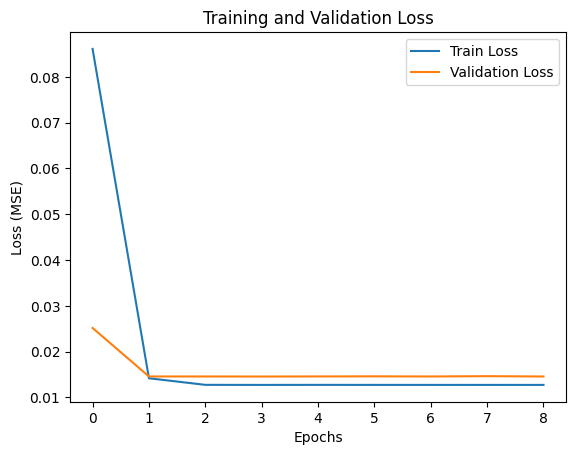

In [58]:
# Define input shape
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, num_features)

# Create the model
model = create_unidirectional_lstm(input_shape=input_shape)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Adjust as needed
    batch_size=128,  # Adjust as needed
    verbose=1,  # 1 shows progress after each epoch
    callbacks=[early_stopping]  # Include early stopping
)

# Evaluate the model
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss (MSE): {val_loss}")
print(f"Validation MAE: {val_mae}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [70]:
# Predict returns for the validation set
y_pred = model.predict(X_val).flatten()  # Predicted returns (flattened to 1D)
y_true = y_val
for i in range(39):
    position = 0  # Current position: 1 = in the market, 0 = out of the market
    cumulative_return = 1
    strategy_returns = []
    for j in range (650):
        pred_return = y_pred[i*650+j]
        true_return = y_true[i*650+j]
        if pred_return > 0 and position == 0:
            # Buy if predicted return is positive and currently out of the market
            position = 1
        elif pred_return < 0 and position == 1:
            # Sell if predicted return is negative and currently in the market
            position = 0
        
        # Calculate daily return based on true return if in the market
        daily_return = true_return if position == 1 else 0
        #daily_return = true_return if position == 1 else 0
        strategy_returns.append(daily_return)

        # Update cumulative return
        cumulative_return *= (1 + daily_return)

    # Convert strategy returns to a DataFrame for analysis
    '''strategy_df = pd.DataFrame({
        "True Return": y_true,
        "Predicted Return": y_pred,
        "Strategy Return": strategy_returns
    })'''

    # Print cumulative return
    print(f"Cumulative Return of {list(data_dict[0].keys())[i]}: {cumulative_return - 1:.2%}")  # As a percentage

793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Cumulative Return of ADBE: 20.30%
Cumulative Return of AMZN: -5.59%
Cumulative Return of AAPL: 54.92%
Cumulative Return of AZO: 83.27%
Cumulative Return of BKNG: 52.35%
Cumulative Return of CNC: 1.27%
Cumulative Return of CMG: 68.02%
Cumulative Return of CTAS: 70.73%
Cumulative Return of STZ: 1.85%
Cumulative Return of CPRT: 55.80%
Cumulative Return of CSGP: 2.29%
Cumulative Return of DHI: 59.89%
Cumulative Return of EXR: 5.47%
Cumulative Return of IT: 93.60%
Cumulative Return of IDXX: 0.81%
Cumulative Return of INTU: 42.49%
Cumulative Return of KLAC: 84.11%
Cumulative Return of LRCX: 20.68%
Cumulative Return of LLY: 193.78%
Cumulative Return of MKTX: -35.54%
Cumulative Return of MA: 18.54%
Cumulative Return of MOH: 45.05%
Cumulative Return of MPWR: 84.20%
Cumulative Return of MNST: 23.11%
Cumulative Return of MCO: 18.02%
Cumulative Return of MSCI: 22.44%
Cumulative Return of ORLY: 76.71%
Cumulative Return of POOL: -9.12%
Cumulative Return of RO

## Cluster 2

In [74]:
# Partition boundaries (replace with actual partition sizes)
partition_sizes = [3250]*47  # Sizes for each partition
partition_indices = np.cumsum([0] + partition_sizes)

# Initialize storage for train and test splits
X_train, X_val, y_train, y_val = [], [], [], []

# Iterate over each partition
for i in range(len(partition_sizes)):
    start_idx, end_idx = partition_indices[i], partition_indices[i+1]
    
    # Extract partition data
    X_partition = X_cluster_2[start_idx:end_idx]
    y_partition = y_cluster_2[start_idx:end_idx]
    
    # Split partition into train and test
    X_train_partition, X_val_partition, y_train_partition, y_val_partition = train_test_split(
        X_partition, y_partition, test_size=0.2, random_state=42, shuffle=False
    )
    
    # Append to the overall train-test lists
    X_train.append(X_train_partition)
    X_val.append(X_val_partition)
    y_train.append(y_train_partition)
    y_val.append(y_val_partition)

# Combine all partitions back into arrays
X_train = np.concatenate(X_train)
X_val = np.concatenate(X_val)
y_train = np.concatenate(y_train)
y_val = np.concatenate(y_val)

# Result: X_train, X_test, y_train, y_test are ready for use


print("Shape of X_train:", X_train.shape)  # Training features
print("Shape of X_val:", X_val.shape)      # Validation features
print("Shape of y_train:", y_train.shape)  # Training targets
print("Shape of y_val:", y_val.shape)      # Validation targets


Shape of X_train: (122200, 20, 33)
Shape of X_val: (30550, 20, 33)
Shape of y_train: (122200,)
Shape of y_val: (30550,)


Epoch 1/50
955/955 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 0.1203 - mae: 0.1203 - val_loss: 0.0242 - val_mae: 0.0242
Epoch 2/50
955/955 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0202 - val_mae: 0.0202
Epoch 3/50
955/955 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.0179 - mae: 0.0179 - val_loss: 0.0202 - val_mae: 0.0202
Epoch 4/50
955/955 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0180 - mae: 0.0180 - val_loss: 0.0205 - val_mae: 0.0205
Epoch 5/50
955/955 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0178 - mae: 0.0178 - val_loss: 0.0201 - val_mae: 0.0201
Epoch 6/50
955/955 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.0179 - mae: 0.0179 - val_loss: 0.0203 - val_mae: 0.0203
Epoch 7/50
955/955 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0178 - mae: 0.0178 - val_loss: 0.0199 - val_mae: 0.0199
Epoch 8/50
955/955 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0178 - mae: 0.0178 - val_loss: 0.0199 - val_mae: 0.0199
Epoch 9/50
955/955 ━━━━━━━━━━━━━━━━━━━━ 

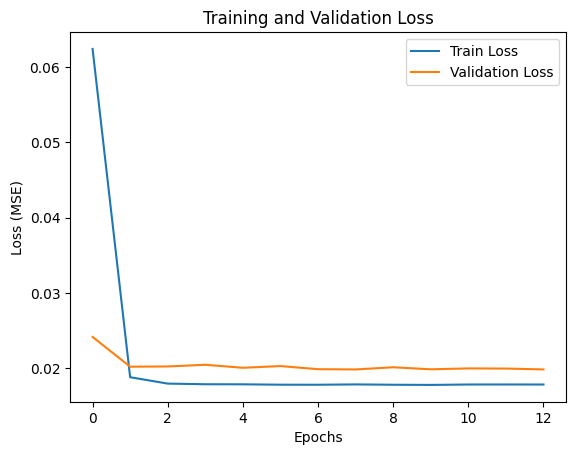

In [75]:
# Define input shape
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, num_features)

# Create the model
model = create_unidirectional_lstm(input_shape=input_shape)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Adjust as needed
    batch_size=128,  # Adjust as needed
    verbose=1,  # 1 shows progress after each epoch
    callbacks=[early_stopping]  # Include early stopping
)

# Evaluate the model
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss (MSE): {val_loss}")
print(f"Validation MAE: {val_mae}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [76]:
# Predict returns for the validation set
y_pred = model.predict(X_val).flatten()  # Predicted returns (flattened to 1D)
y_true = y_val
for i in range(47):
    position = 0  # Current position: 1 = in the market, 0 = out of the market
    cumulative_return = 1
    strategy_returns = []
    for j in range (650):
        pred_return = y_pred[i*650+j]
        true_return = y_true[i*650+j]
        if pred_return > 0 and position == 0:
            # Buy if predicted return is positive and currently out of the market
            position = 1
        elif pred_return < 0 and position == 1:
            # Sell if predicted return is negative and currently in the market
            position = 0
        
        # Calculate daily return based on true return if in the market
        daily_return = true_return if position == 1 else 0
        #daily_return = true_return if position == 1 else 0
        strategy_returns.append(daily_return)

        # Update cumulative return
        cumulative_return *= (1 + daily_return)

    # Convert strategy returns to a DataFrame for analysis
    '''strategy_df = pd.DataFrame({
        "True Return": y_true,
        "Predicted Return": y_pred,
        "Strategy Return": strategy_returns
    })'''

    # Print cumulative return
    print(f"Cumulative Return of {list(data_dict[1].keys())[i]}: {cumulative_return - 1:.2%}")  # As a percentage

955/955 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Cumulative Return of ALB: -18.55%
Cumulative Return of ALGN: -33.70%
Cumulative Return of APA: 80.05%
Cumulative Return of BBY: -50.24%
Cumulative Return of CCL: -33.18%
Cumulative Return of CF: 47.38%
Cumulative Return of CTRA: 27.72%
Cumulative Return of DECK: 54.98%
Cumulative Return of DAL: 1.24%
Cumulative Return of DVN: -3.75%
Cumulative Return of EOG: 79.72%
Cumulative Return of EQT: 35.75%
Cumulative Return of EXPE: -25.26%
Cumulative Return of FSLR: 173.18%
Cumulative Return of FCX: -23.70%
Cumulative Return of HAL: 23.50%
Cumulative Return of HES: 64.10%
Cumulative Return of INCY: -6.50%
Cumulative Return of PODD: -52.01%
Cumulative Return of KEY: -39.54%
Cumulative Return of LVS: -19.64%
Cumulative Return of LEN: 37.50%
Cumulative Return of LYV: 3.11%
Cumulative Return of MTCH: -72.23%
Cumulative Return of MGM: -0.74%
Cumulative Return of MU: 2.30%
Cumulative Return of MHK: -50.22%
Cumulative Return of MOS: -0.01%
Cumulative Return of

## Cluster 3

In [77]:
# Partition boundaries (replace with actual partition sizes)
partition_sizes = [3250]*13  # Sizes for each partition
partition_indices = np.cumsum([0] + partition_sizes)

# Initialize storage for train and test splits
X_train, X_val, y_train, y_val = [], [], [], []

# Iterate over each partition
for i in range(len(partition_sizes)):
    start_idx, end_idx = partition_indices[i], partition_indices[i+1]
    
    # Extract partition data
    X_partition = X_cluster_3[start_idx:end_idx]
    y_partition = y_cluster_3[start_idx:end_idx]
    
    # Split partition into train and test
    X_train_partition, X_val_partition, y_train_partition, y_val_partition = train_test_split(
        X_partition, y_partition, test_size=0.2, random_state=42, shuffle=False
    )
    
    # Append to the overall train-test lists
    X_train.append(X_train_partition)
    X_val.append(X_val_partition)
    y_train.append(y_train_partition)
    y_val.append(y_val_partition)

# Combine all partitions back into arrays
X_train = np.concatenate(X_train)
X_val = np.concatenate(X_val)
y_train = np.concatenate(y_train)
y_val = np.concatenate(y_val)

# Result: X_train, X_test, y_train, y_test are ready for use


print("Shape of X_train:", X_train.shape)  # Training features
print("Shape of X_val:", X_val.shape)      # Validation features
print("Shape of y_train:", y_train.shape)  # Training targets
print("Shape of y_val:", y_val.shape)      # Validation targets


Shape of X_train: (33800, 20, 33)
Shape of X_val: (8450, 20, 33)
Shape of y_train: (33800,)
Shape of y_val: (8450,)


Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1686 - mae: 0.1686 - val_loss: 0.0626 - val_mae: 0.0626
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0456 - mae: 0.0456 - val_loss: 0.0307 - val_mae: 0.0307
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0289 - mae: 0.0289 - val_loss: 0.0234 - val_mae: 0.0234
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0218 - mae: 0.0218 - val_loss: 0.0203 - val_mae: 0.0203
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0191 - mae: 0.0191 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0181 - mae: 0.0181 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0173 - mae: 0.0173 - val_loss: 0.0199 - val_mae: 0.0199
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0176 - mae: 0.0176 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 9/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/

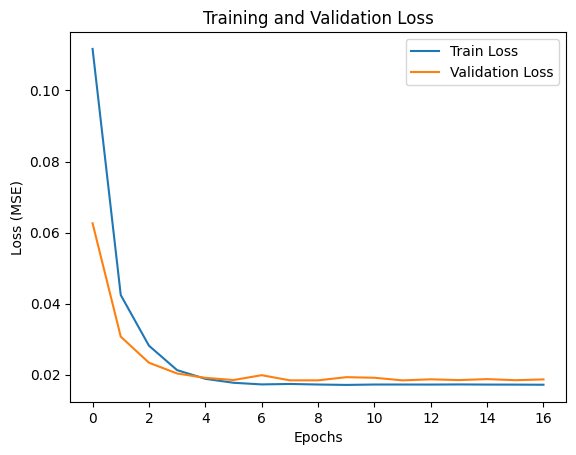

In [78]:
# Define input shape
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, num_features)

# Create the model
model = create_unidirectional_lstm(input_shape=input_shape)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Adjust as needed
    batch_size=128,  # Adjust as needed
    verbose=1,  # 1 shows progress after each epoch
    callbacks=[early_stopping]  # Include early stopping
)

# Evaluate the model
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss (MSE): {val_loss}")
print(f"Validation MAE: {val_mae}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [83]:
# Predict returns for the validation set
y_pred = model.predict(X_val).flatten()  # Predicted returns (flattened to 1D)
y_true = y_val
for i in range(13):
    position = 0  # Current position: 1 = in the market, 0 = out of the market
    cumulative_return = 1
    strategy_returns = []
    for j in range (650):
        pred_return = y_pred[i*650+j]
        true_return = y_true[i*650+j]
        if pred_return > 0 and position == 0:
            # Buy if predicted return is positive and currently out of the market
            position = 1
        elif pred_return < 0 and position == 1:
            # Sell if predicted return is negative and currently in the market
            position = 0
        
        # Calculate daily return based on true return if in the market
        daily_return = true_return if position == 1 else 0
        #daily_return = true_return if position == 1 else 0
        strategy_returns.append(daily_return)

        # Update cumulative return
        cumulative_return *= (1 + daily_return)

    # Convert strategy returns to a DataFrame for analysis
    '''strategy_df = pd.DataFrame({
        "True Return": y_true,
        "Predicted Return": y_pred,
        "Strategy Return": strategy_returns
    })'''

    # Print cumulative return
    print(f"Cumulative Return of {list(data_dict[2].keys())[i]}: {cumulative_return - 1:.2%}")  # As a percentage

3738/3738 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
Cumulative Return of AXON: -4.89%
Cumulative Return of AVGO: 7.10%
Cumulative Return of BLDR: -1.66%
Cumulative Return of CDNS: 14.51%
Cumulative Return of DPZ: 4.08%
Cumulative Return of FICO: -10.71%
Cumulative Return of FTNT: -45.77%
Cumulative Return of LULU: 17.75%
Cumulative Return of NFLX: -5.91%
Cumulative Return of NVDA: 3.11%
Cumulative Return of ODFL: 13.90%
Cumulative Return of TPL: -21.84%
Cumulative Return of URI: -6.66%


## Cluster 4

In [80]:
# Partition boundaries (replace with actual partition sizes)
partition_sizes = [3250]*184  # Sizes for each partition
partition_indices = np.cumsum([0] + partition_sizes)

# Initialize storage for train and test splits
X_train, X_val, y_train, y_val = [], [], [], []

# Iterate over each partition
for i in range(len(partition_sizes)):
    start_idx, end_idx = partition_indices[i], partition_indices[i+1]
    
    # Extract partition data
    X_partition = X_cluster_4[start_idx:end_idx]
    y_partition = y_cluster_4[start_idx:end_idx]
    
    # Split partition into train and test
    X_train_partition, X_val_partition, y_train_partition, y_val_partition = train_test_split(
        X_partition, y_partition, test_size=0.2, random_state=42, shuffle=False
    )
    
    # Append to the overall train-test lists
    X_train.append(X_train_partition)
    X_val.append(X_val_partition)
    y_train.append(y_train_partition)
    y_val.append(y_val_partition)

# Combine all partitions back into arrays
X_train = np.concatenate(X_train)
X_val = np.concatenate(X_val)
y_train = np.concatenate(y_train)
y_val = np.concatenate(y_val)

# Result: X_train, X_test, y_train, y_test are ready for use


print("Shape of X_train:", X_train.shape)  # Training features
print("Shape of X_val:", X_val.shape)      # Validation features
print("Shape of y_train:", y_train.shape)  # Training targets
print("Shape of y_val:", y_val.shape)      # Validation targets


Shape of X_train: (478400, 20, 33)
Shape of X_val: (119600, 20, 33)
Shape of y_train: (478400,)
Shape of y_val: (119600,)


Epoch 1/50
3738/3738 ━━━━━━━━━━━━━━━━━━━━ 53s 14ms/step - loss: 0.0409 - mae: 0.0409 - val_loss: 0.0117 - val_mae: 0.0117
Epoch 2/50
3738/3738 ━━━━━━━━━━━━━━━━━━━━ 49s 13ms/step - loss: 0.0102 - mae: 0.0102 - val_loss: 0.0113 - val_mae: 0.0113
Epoch 3/50
3738/3738 ━━━━━━━━━━━━━━━━━━━━ 47s 13ms/step - loss: 0.0102 - mae: 0.0102 - val_loss: 0.0113 - val_mae: 0.0113
Epoch 4/50
3738/3738 ━━━━━━━━━━━━━━━━━━━━ 47s 13ms/step - loss: 0.0102 - mae: 0.0102 - val_loss: 0.0113 - val_mae: 0.0113
Epoch 5/50
3738/3738 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step - loss: 0.0102 - mae: 0.0102 - val_loss: 0.0115 - val_mae: 0.0115
Epoch 6/50
3738/3738 ━━━━━━━━━━━━━━━━━━━━ 49s 13ms/step - loss: 0.0102 - mae: 0.0102 - val_loss: 0.0113 - val_mae: 0.0113
Epoch 7/50
3738/3738 ━━━━━━━━━━━━━━━━━━━━ 52s 14ms/step - loss: 0.0101 - mae: 0.0101 - val_loss: 0.0112 - val_mae: 0.0112
Epoch 8/50
3738/3738 ━━━━━━━━━━━━━━━━━━━━ 51s 14ms/step - loss: 0.0102 - mae: 0.0102 - val_loss: 0.0112 - val_mae: 0.0112
Epoch 9/50
3738/3738 ━━━

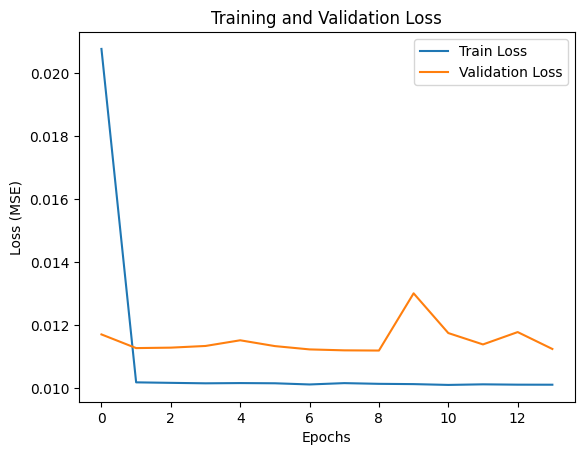

In [81]:
# Define input shape
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, num_features)

# Create the model
model = create_unidirectional_lstm(input_shape=input_shape)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Adjust as needed
    batch_size=128,  # Adjust as needed
    verbose=1,  # 1 shows progress after each epoch
    callbacks=[early_stopping]  # Include early stopping
)

# Evaluate the model
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss (MSE): {val_loss}")
print(f"Validation MAE: {val_mae}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [85]:
# Predict returns for the validation set
y_pred = model.predict(X_val).flatten()  # Predicted returns (flattened to 1D)
y_true = y_val
for i in range(184):
    position = 0  # Current position: 1 = in the market, 0 = out of the market
    cumulative_return = 1
    strategy_returns = []
    for j in range (650):
        pred_return = y_pred[i*650+j]
        true_return = y_true[i*650+j]
        if pred_return > 0 and position == 0:
            # Buy if predicted return is positive and currently out of the market
            position = 1
        elif pred_return < 0 and position == 1:
            # Sell if predicted return is negative and currently in the market
            position = 0
        
        # Calculate daily return based on true return if in the market
        daily_return = true_return if position == 1 else 0
        #daily_return = true_return if position == 1 else 0
        strategy_returns.append(daily_return)

        # Update cumulative return
        cumulative_return *= (1 + daily_return)

    # Convert strategy returns to a DataFrame for analysis
    '''strategy_df = pd.DataFrame({
        "True Return": y_true,
        "Predicted Return": y_pred,
        "Strategy Return": strategy_returns
    })'''

    # Print cumulative return
    print(f"Cumulative Return of {list(data_dict[3].keys())[i]}: {cumulative_return - 1:.2%}")  # As a percentage

3738/3738 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Cumulative Return of MMM: -4.89%
Cumulative Return of AOS: 7.10%
Cumulative Return of ABT: -1.66%
Cumulative Return of ACN: 14.51%
Cumulative Return of AFL: 4.08%
Cumulative Return of APD: -10.71%
Cumulative Return of ARE: -45.77%
Cumulative Return of LNT: 17.75%
Cumulative Return of ALL: -5.91%
Cumulative Return of GOOGL: 3.11%
Cumulative Return of GOOG: 13.90%
Cumulative Return of MO: -21.84%
Cumulative Return of AEE: -6.66%
Cumulative Return of AEP: 20.09%
Cumulative Return of AMT: -21.43%
Cumulative Return of AWK: 8.27%
Cumulative Return of AME: 23.37%
Cumulative Return of AMGN: 10.37%
Cumulative Return of APH: 34.82%
Cumulative Return of AON: 30.57%
Cumulative Return of ACGL: 64.28%
Cumulative Return of ADM: 10.39%
Cumulative Return of AJG: 28.90%
Cumulative Return of AIZ: 39.04%
Cumulative Return of T: 12.87%
Cumulative Return of ATO: 9.73%
Cumulative Return of ADP: 68.98%
Cumulative Return of AVB: 46.85%
Cumulative Return of AVY: 19.23%

## Cluster 5

In [86]:
# Partition boundaries (replace with actual partition sizes)
partition_sizes = [3250]*127  # Sizes for each partition
partition_indices = np.cumsum([0] + partition_sizes)

# Initialize storage for train and test splits
X_train, X_val, y_train, y_val = [], [], [], []

# Iterate over each partition
for i in range(len(partition_sizes)):
    start_idx, end_idx = partition_indices[i], partition_indices[i+1]
    
    # Extract partition data
    X_partition = X_cluster_5[start_idx:end_idx]
    y_partition = y_cluster_5[start_idx:end_idx]
    
    # Split partition into train and test
    X_train_partition, X_val_partition, y_train_partition, y_val_partition = train_test_split(
        X_partition, y_partition, test_size=0.2, random_state=42, shuffle=False
    )
    
    # Append to the overall train-test lists
    X_train.append(X_train_partition)
    X_val.append(X_val_partition)
    y_train.append(y_train_partition)
    y_val.append(y_val_partition)

# Combine all partitions back into arrays
X_train = np.concatenate(X_train)
X_val = np.concatenate(X_val)
y_train = np.concatenate(y_train)
y_val = np.concatenate(y_val)

# Result: X_train, X_test, y_train, y_test are ready for use


print("Shape of X_train:", X_train.shape)  # Training features
print("Shape of X_val:", X_val.shape)      # Validation features
print("Shape of y_train:", y_train.shape)  # Training targets
print("Shape of y_val:", y_val.shape)      # Validation targets


Shape of X_train: (330200, 20, 33)
Shape of X_val: (82550, 20, 33)
Shape of y_train: (330200,)
Shape of y_val: (82550,)


Epoch 1/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - loss: 0.0796 - mae: 0.0796 - val_loss: 0.0162 - val_mae: 0.0162
Epoch 2/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - loss: 0.0137 - mae: 0.0137 - val_loss: 0.0147 - val_mae: 0.0147
Epoch 3/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - loss: 0.0134 - mae: 0.0134 - val_loss: 0.0148 - val_mae: 0.0148
Epoch 4/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - loss: 0.0133 - mae: 0.0133 - val_loss: 0.0147 - val_mae: 0.0147
Epoch 5/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - loss: 0.0133 - mae: 0.0133 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 6/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - loss: 0.0133 - mae: 0.0133 - val_loss: 0.0147 - val_mae: 0.0147
Epoch 7/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - loss: 0.0133 - mae: 0.0133 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 8/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - loss: 0.0133 - mae: 0.0133 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 9/50
2580/2580 ━━━

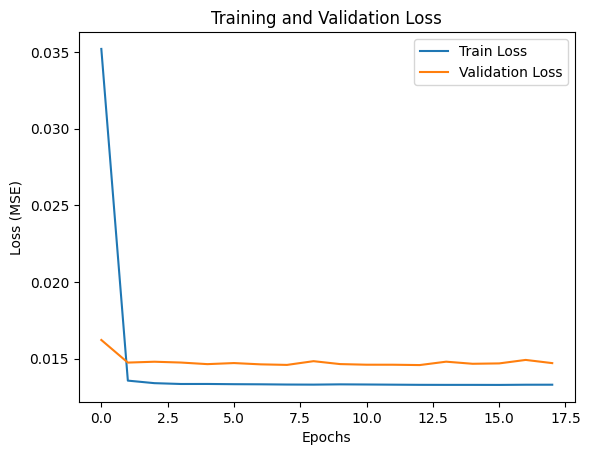

In [87]:
# Define input shape
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, num_features)

# Create the model
model = create_unidirectional_lstm(input_shape=input_shape)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Adjust as needed
    batch_size=128,  # Adjust as needed
    verbose=1,  # 1 shows progress after each epoch
    callbacks=[early_stopping]  # Include early stopping
)

# Evaluate the model
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss (MSE): {val_loss}")
print(f"Validation MAE: {val_mae}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [94]:
results_dict={}
y_pred = model.predict(X_val).flatten()  # Predicted returns (flattened to 1D)
y_true = y_val
for i in range(127):
    position = 0  # Current position: 1 = in the market, 0 = out of the market
    cumulative_return = 1
    buy_hold_return=1
    strategy_returns = []
    for j in range (650):
        pred_return = y_pred[i*650+j]
        true_return = y_true[i*650+j]
        if pred_return > 0 and position == 0:
            # Buy if predicted return is positive and currently out of the market
            position = 1
        elif pred_return < 0 and position == 1:
            # Sell if predicted return is negative and currently in the market
            position = 0
        
        # Calculate daily return based on true return if in the market
        daily_return = true_return if position == 1 else 0

        #daily_return = true_return if position == 1 else 0
        strategy_returns.append(daily_return)

        # Update cumulative return
        cumulative_return *= (1 + daily_return)
        buy_hold_return*=(1+true_return)

    # Append the new row to the results DataFrame
    results_dict[list(data_dict[4].keys())[i]] = [cumulative_return - 1, buy_hold_return - 1]
    # Print cumulative return
    #print(f"{list(data_dict[4].keys())[i]}: Cumulative Return = {cumulative_return - 1:.2%} True Buy-and-Hold Return = {buy_hold_return - 1:.2%}" )  # As a percentage

2580/2580 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


In [97]:
df = pd.DataFrame(results_dict).T
df.columns=['Cumulative Return', 'Buy-and-Hold Return']
df

,Cumulative Return,Buy-and-Hold Return
AES,-0.269597,-0.248927
A,0.091746,0.013338
AKAM,0.011980,0.039526
AXP,0.018628,0.143991
AIG,0.334668,0.265173
...,...,...
WBA,-0.284614,-0.505867
WFC,0.089156,0.041473
WELL,0.479862,0.175619
WY,0.073893,-0.100155


In [ ]:
# Directional Accuracy
directional_accuracy = np.mean((y_pred > 0) == (y_val > 0))
print(f"Directional Accuracy: {directional_accuracy:.2%}")

print(f"Mean of Predicted Returns: {np.mean(y_pred)}")
print(f"Mean of Actual Returns: {np.mean(y_val)}")

Directional Accuracy: 49.68%
Mean of Predicted Returns: 0.0016879679169505835
Mean of Actual Returns: 0.0003776103226422065


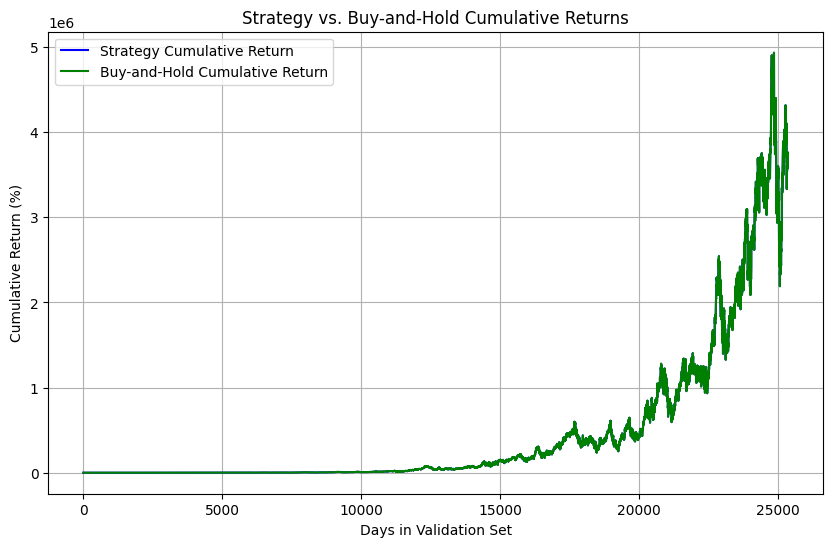

In [61]:
# Calculate cumulative returns for plotting
strategy_cumulative = (np.cumprod(1 + np.array(strategy_returns)) - 1) * 100
true_cumulative = (np.cumprod(1 + y_true) - 1) * 100

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(strategy_cumulative, label="Strategy Cumulative Return", color='blue')
plt.plot(true_cumulative, label="Buy-and-Hold Cumulative Return", color='green')
plt.xlabel("Days in Validation Set")
plt.ylabel("Cumulative Return (%)")
plt.title("Strategy vs. Buy-and-Hold Cumulative Returns")
plt.legend()
plt.grid()
plt.show()

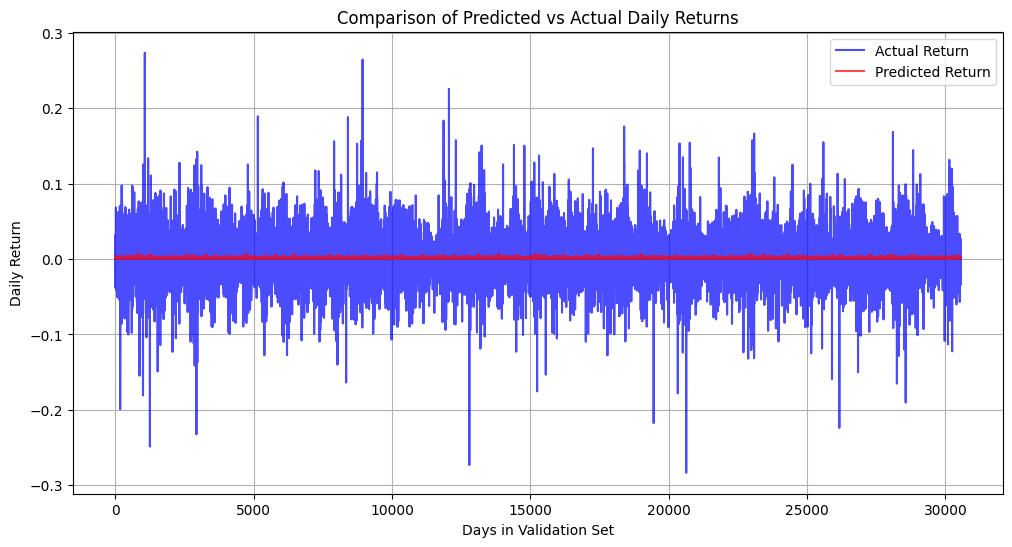

In [37]:
import matplotlib.pyplot as plt

# Plot predicted vs. actual returns
plt.figure(figsize=(12, 6))
plt.plot(y_val, label='Actual Return', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted Return', color='red', alpha=0.7)
plt.xlabel("Days in Validation Set")
plt.ylabel("Daily Return")
plt.title("Comparison of Predicted vs Actual Daily Returns")
plt.legend()
plt.grid()
plt.show()
